In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.stats import ttest_ind, chi2_contingency
import statsmodels.api as sm
from statsmodels.formula.api import ols
import warnings
from pandas import MultiIndex
warnings.filterwarnings('ignore')
import os

In [5]:
df = pd.read_csv("diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
Identifying the dimensions

In [6]:
df.shape

(768, 9)

In [7]:
columns = df.columns
columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [8]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:

Variable identification

In [9]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [ ]:
Univarient Analysis

In [10]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<Axes: title={'center': 'Outcome'}, ylabel='Frequency'>

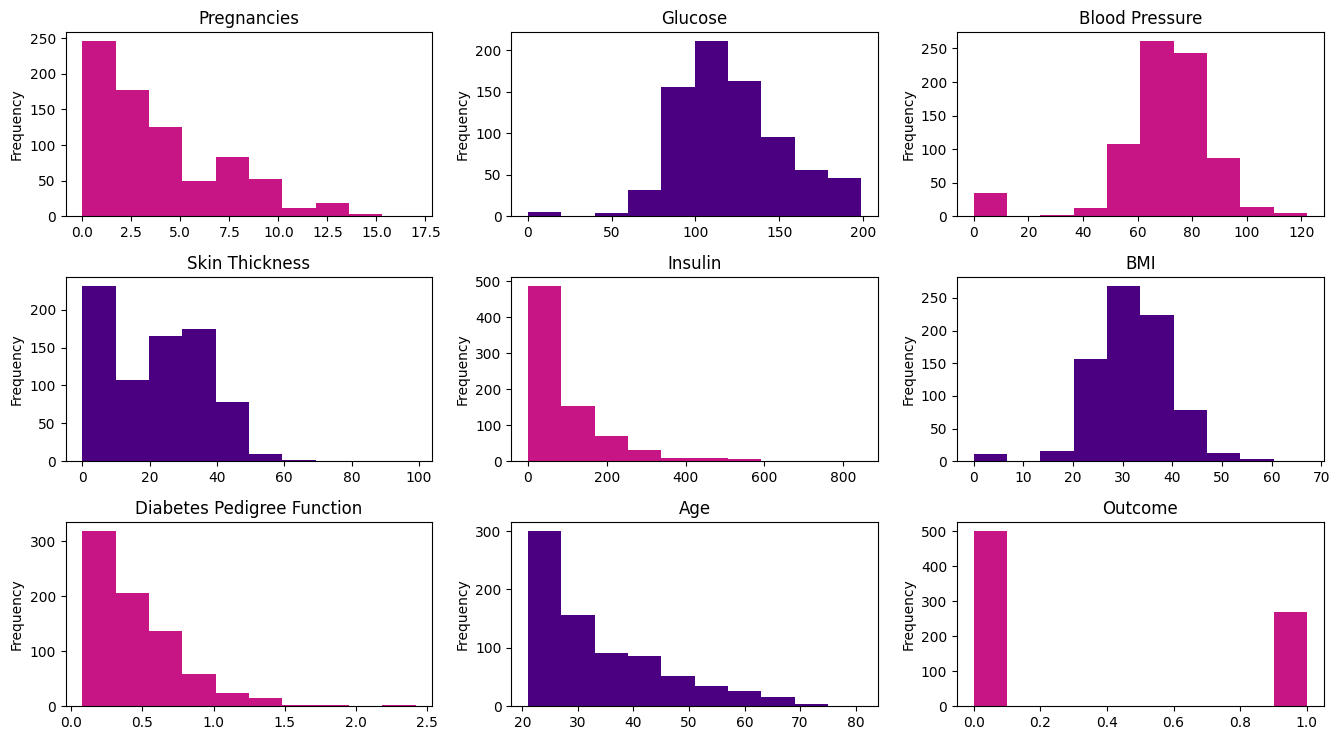

In [11]:
plt.rcParams["figure.figsize"] = [13.50, 7.50]
plt.rcParams["figure.autolayout"] = True
figure, axis = plt.subplots(3, 3)
  
df['Pregnancies'].plot.hist(title="Pregnancies",ax=axis[0][0],color="MEDIUMVIOLETRED")
df['Glucose'].plot.hist(title="Glucose",ax=axis[0][1],color="INDIGO")
df['BloodPressure'].plot.hist(title="Blood Pressure",ax=axis[0][2],color="MEDIUMVIOLETRED")
df['SkinThickness'].plot.hist(title="Skin Thickness",ax=axis[1][0],color="INDIGO")
df['Insulin'].plot.hist(title="Insulin",ax=axis[1][1],color="MEDIUMVIOLETRED")
df['BMI'].plot.hist(title="BMI",ax=axis[1][2],color="INDIGO")
df['DiabetesPedigreeFunction'].plot.hist(title="Diabetes Pedigree Function",ax=axis[2][0],color="MEDIUMVIOLETRED")
df['Age'].plot.hist(title="Age",ax=axis[2][1],color="INDIGO")
df['Outcome'].plot.hist(title="Outcome",ax=axis[2][2],color="MEDIUMVIOLETRED")

<Axes: title={'center': 'Outcome'}>

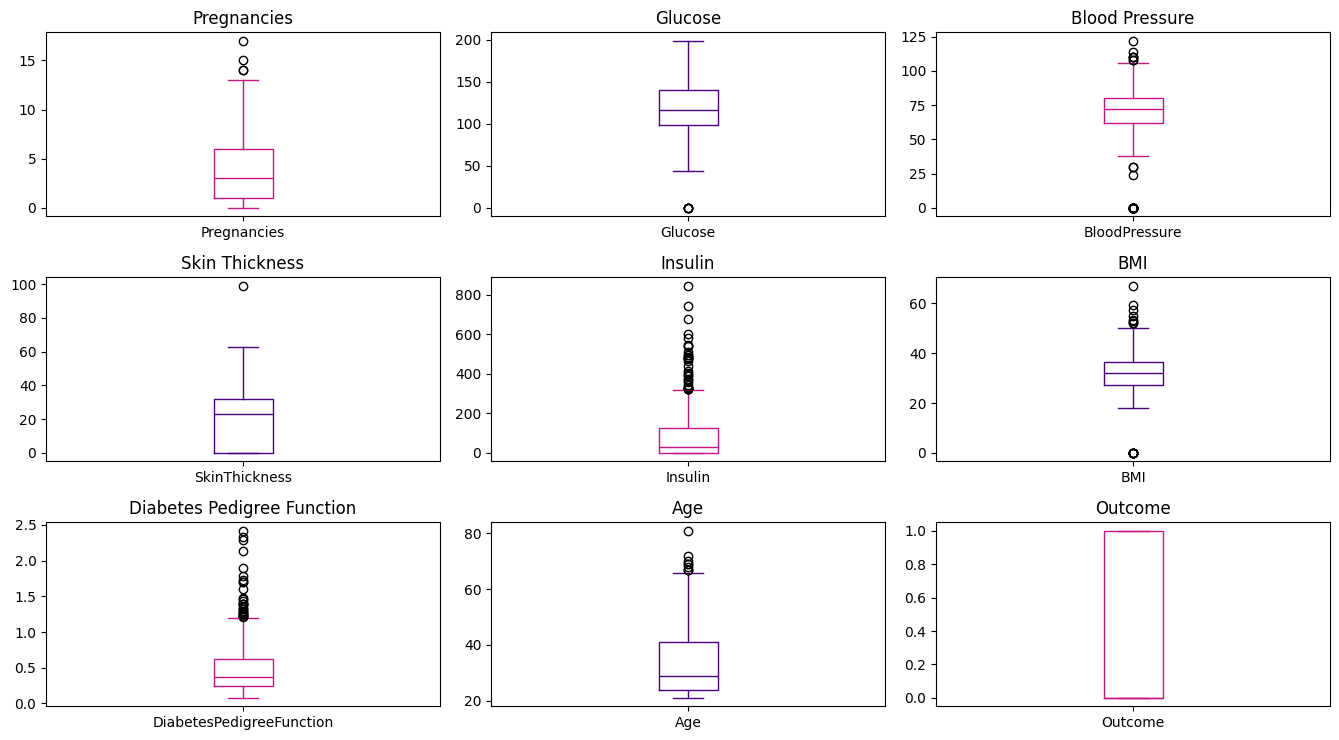

In [12]:
plt.rcParams["figure.figsize"] = [13.50, 7.50]
plt.rcParams["figure.autolayout"] = True
figure, axis = plt.subplots(3, 3)
  
df['Pregnancies'].plot.box(title="Pregnancies",ax=axis[0][0],color="MEDIUMVIOLETRED")
df['Glucose'].plot.box(title="Glucose",ax=axis[0][1],color="INDIGO")
df['BloodPressure'].plot.box(title="Blood Pressure",ax=axis[0][2],color="MEDIUMVIOLETRED")
df['SkinThickness'].plot.box(title="Skin Thickness",ax=axis[1][0],color="INDIGO")
df['Insulin'].plot.box(title="Insulin",ax=axis[1][1],color="MEDIUMVIOLETRED")
df['BMI'].plot.box(title="BMI",ax=axis[1][2],color="INDIGO")
df['DiabetesPedigreeFunction'].plot.box(title="Diabetes Pedigree Function",ax=axis[2][0],color="MEDIUMVIOLETRED")
df['Age'].plot.box(title="Age",ax=axis[2][1],color="INDIGO")
df['Outcome'].plot.box(title="Outcome",ax=axis[2][2],color="MEDIUMVIOLETRED")

In [ ]:
Bivarient Analysis

In [13]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


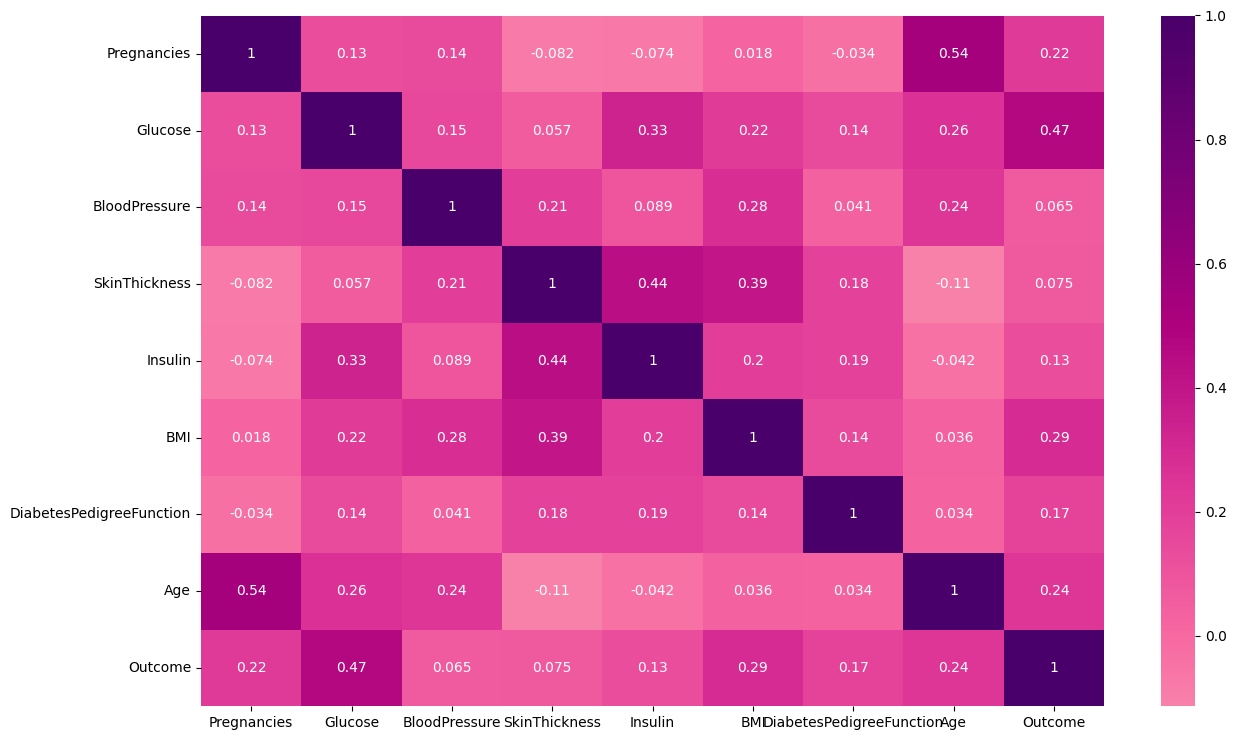

In [14]:
dataplot = sns.heatmap(df.corr(), cmap='RdPu', annot=True, center=0)

In [15]:
columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

<Axes: title={'center': 'Outcome'}>

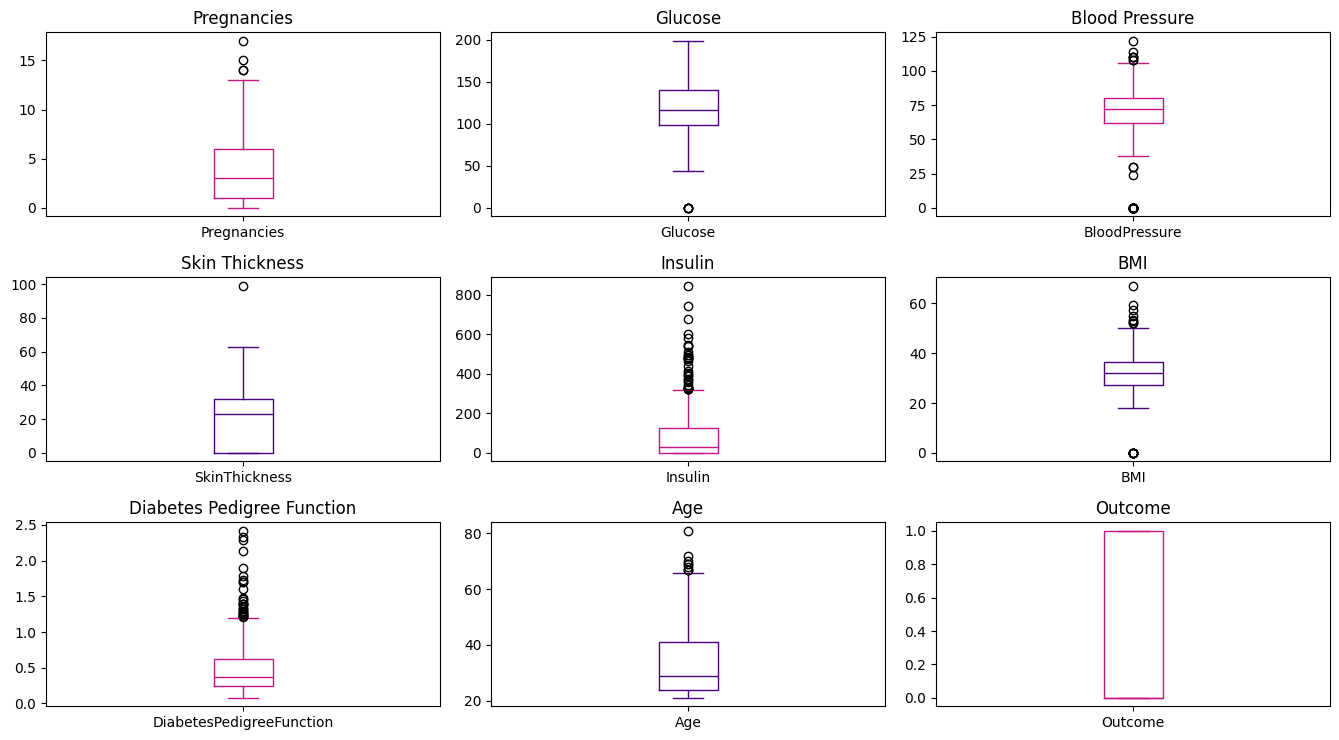

In [16]:
plt.rcParams["figure.figsize"] = [13.50, 7.50]
plt.rcParams["figure.autolayout"] = True
figure, axis = plt.subplots(3, 3)
  
df['Pregnancies'].plot.box(title="Pregnancies",ax=axis[0][0],color="MEDIUMVIOLETRED")
df['Glucose'].plot.box(title="Glucose",ax=axis[0][1],color="INDIGO")
df['BloodPressure'].plot.box(title="Blood Pressure",ax=axis[0][2],color="MEDIUMVIOLETRED")
df['SkinThickness'].plot.box(title="Skin Thickness",ax=axis[1][0],color="INDIGO")
df['Insulin'].plot.box(title="Insulin",ax=axis[1][1],color="MEDIUMVIOLETRED")
df['BMI'].plot.box(title="BMI",ax=axis[1][2],color="INDIGO")
df['DiabetesPedigreeFunction'].plot.box(title="Diabetes Pedigree Function",ax=axis[2][0],color="MEDIUMVIOLETRED")
df['Age'].plot.box(title="Age",ax=axis[2][1],color="INDIGO")
df['Outcome'].plot.box(title="Outcome",ax=axis[2][2],color="MEDIUMVIOLETRED")

In [18]:
for i in range(len(columns)-1):
    for j in range(i+1,len(columns)):
        if 0.5<=df[columns[i]].corr(df[columns[j]]):
            print("We can drop either "+str(columns[i])+" or "+str(columns[j]))

We can drop either Pregnancies or Age


In [19]:
columns = columns[1:]
df.drop(['Pregnancies'], axis=1, inplace=True)

In [20]:
columns = columns[1:]
df.drop(['DiabetesPedigreeFunction'], axis=1, inplace=True)

In [21]:
df

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age,Outcome
0,148,72,35,0,33.6,50,1
1,85,66,29,0,26.6,31,0
2,183,64,0,0,23.3,32,1
3,89,66,23,94,28.1,21,0
4,137,40,35,168,43.1,33,1
...,...,...,...,...,...,...,...
763,101,76,48,180,32.9,63,0
764,122,70,27,0,36.8,27,0
765,121,72,23,112,26.2,30,0
766,126,60,0,0,30.1,47,1


In [ ]:
Missing Value Treatment

In [22]:
df.describe()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,120.894531,69.105469,20.536458,79.799479,31.992578,33.240885,0.348958
std,31.972618,19.355807,15.952218,115.244002,7.884160,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000,0.000000
25%,99.000000,62.000000,0.000000,0.000000,27.300000,24.000000,0.000000
50%,117.000000,72.000000,23.000000,30.500000,32.000000,29.000000,0.000000
75%,140.250000,80.000000,32.000000,127.250000,36.600000,41.000000,1.000000
max,199.000000,122.000000,99.000000,846.000000,67.100000,81.000000,1.000000


In [23]:
df.isnull().sum()

Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
Age              0
Outcome          0
dtype: int64

<Axes: title={'center': 'Outcome'}>

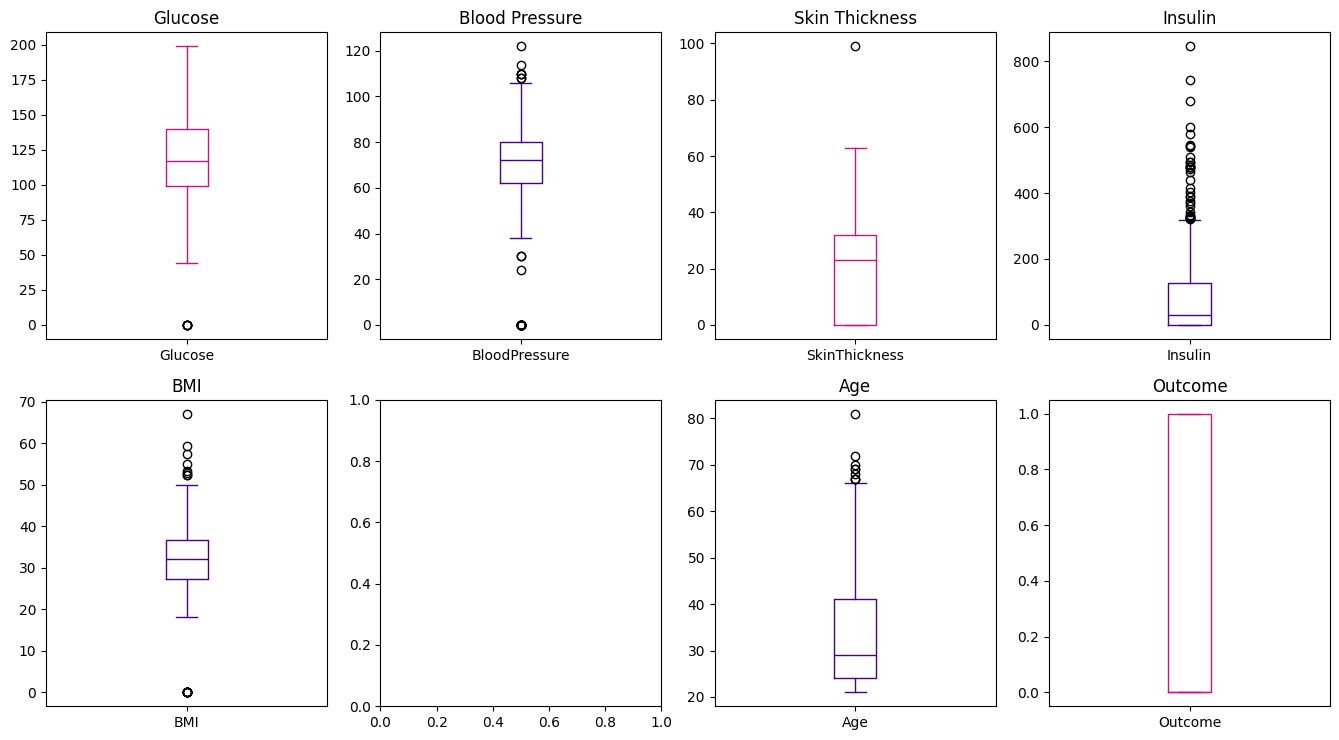

In [25]:
plt.rcParams["figure.figsize"] = [13.50, 7.50]
plt.rcParams["figure.autolayout"] = True
figure, axis = plt.subplots(2, 4)
  
df['Glucose'].plot.box(title="Glucose",ax=axis[0][0],color="MEDIUMVIOLETRED")
df['BloodPressure'].plot.box(title="Blood Pressure",ax=axis[0][1],color="INDIGO")
df['SkinThickness'].plot.box(title="Skin Thickness",ax=axis[0][2],color="MEDIUMVIOLETRED")
df['Insulin'].plot.box(title="Insulin",ax=axis[0][3],color="INDIGO")
df['BMI'].plot.box(title="BMI",ax=axis[1][0],color="INDIGO")
df['Age'].plot.box(title="Age",ax=axis[1][2],color="INDIGO")
df['Outcome'].plot.box(title="Outcome",ax=axis[1][3],color="MEDIUMVIOLETRED")

In [27]:
columns

Index(['BloodPressure', 'SkinThickness', 'Insulin', 'BMI',
       'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [30]:
Q1 = df.Glucose.quantile(0.25)
Q3 = df.Glucose.quantile(0.75)
IQR = Q3-Q1
lower_limit = Q1-1.5*IQR
upper_limit = Q3+1.5*IQR
df.loc[df['Glucose']<=lower_limit,'Glucose'] = np.mean(df['Glucose'])
df.loc[df['Glucose']>upper_limit, 'Glucose'] = np.mean(df['Glucose'])

In [29]:
Q1 = df.BloodPressure.quantile(0.25)
Q3 = df.BloodPressure.quantile(0.75)
IQR = Q3-Q1
lower_limit = Q1-1.5*IQR
upper_limit = Q3+1.5*IQR
df.loc[df['BloodPressure']<=lower_limit,'BloodPressure'] = np.mean(df['BloodPressure'])
df.loc[df['BloodPressure']>upper_limit,'BloodPressure'] = np.mean(df['BloodPressure'])

In [31]:
Q1 = df.SkinThickness.quantile(0.25)
Q3 = df.SkinThickness.quantile(0.75)
IQR = Q3-Q1
lower_limit = Q1-1.5*IQR
upper_limit = Q3+1.5*IQR
df.loc[df['SkinThickness']<=lower_limit,'SkinThickness'] = np.mean(df['SkinThickness'])
df.loc[df['SkinThickness']>upper_limit,'SkinThickness'] = np.mean(df['SkinThickness'])

In [32]:
Q1 = df.Insulin.quantile(0.25)
Q3 = df.Insulin.quantile(0.75)
IQR = Q3-Q1
lower_limit = Q1-1.5*IQR
upper_limit = Q3+1.5*IQR
df.loc[df['Insulin']<=lower_limit,'Insulin'] = np.mean(df['Insulin'])
df.loc[df['Insulin']>upper_limit,'Insulin'] = np.mean(df['Insulin'])

In [33]:
Q1 = df.BMI.quantile(0.25)
Q3 = df.BMI.quantile(0.75)
IQR = Q3-Q1
lower_limit = Q1-1.5*IQR
upper_limit = Q3+1.5*IQR
df.loc[df['BMI']<=lower_limit,'BMI'] = np.mean(df['BMI'])
df.loc[df['BMI']>upper_limit,'BMI'] = np.mean(df['BMI'])

In [34]:
Q1 = df.Age.quantile(0.25)
Q3 = df.Age.quantile(0.75)
IQR = Q3-Q1
lower_limit = Q1-1.5*IQR
upper_limit = Q3+1.5*IQR
df.loc[df['Age']<=lower_limit,'Age'] = np.mean(df['Age'])
df.loc[df['Age']>upper_limit,'Age'] = np.mean(df['Age'])

In [35]:
Q1 = df.Outcome.quantile(0.25)
Q3 = df.Outcome.quantile(0.75)
IQR = Q3-Q1
lower_limit = Q1-1.5*IQR
upper_limit = Q3+1.5*IQR
df.loc[df['Outcome']<=lower_limit,'Outcome'] = np.mean(df['Outcome'])
df.loc[df['Outcome']>upper_limit,'Outcome'] = np.mean(df['Outcome'])

<Axes: title={'center': 'Outcome'}>

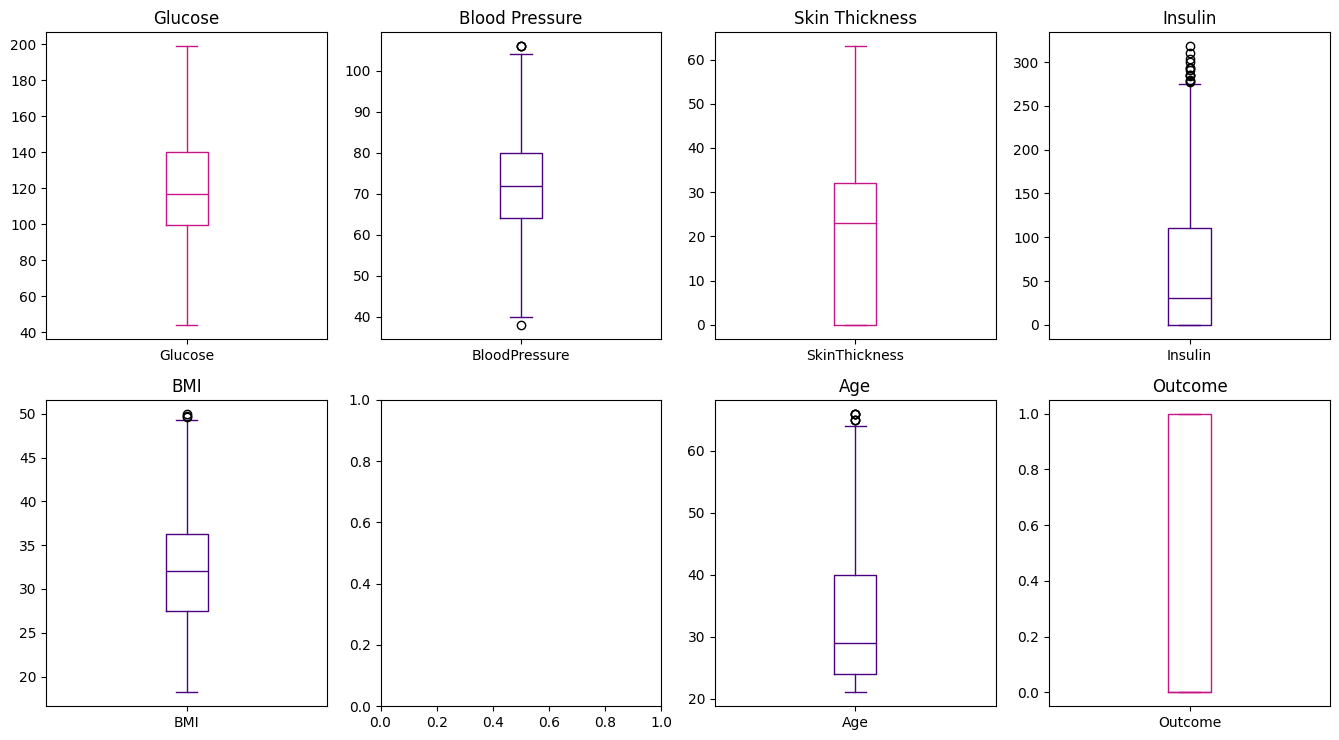

In [37]:
plt.rcParams["figure.figsize"] = [13.50, 7.50]
plt.rcParams["figure.autolayout"] = True
figure, axis = plt.subplots(2, 4)
  
df['Glucose'].plot.box(title="Glucose",ax=axis[0][0],color="MEDIUMVIOLETRED")
df['BloodPressure'].plot.box(title="Blood Pressure",ax=axis[0][1],color="INDIGO")
df['SkinThickness'].plot.box(title="Skin Thickness",ax=axis[0][2],color="MEDIUMVIOLETRED")
df['Insulin'].plot.box(title="Insulin",ax=axis[0][3],color="INDIGO")
df['BMI'].plot.box(title="BMI",ax=axis[1][0],color="INDIGO")
df['Age'].plot.box(title="Age",ax=axis[1][2],color="INDIGO")
df['Outcome'].plot.box(title="Outcome",ax=axis[1][3],color="MEDIUMVIOLETRED")

In [38]:
df.to_csv('diabetes_FS.csv', encoding='utf-8', index=False)